In [1]:
import pandas as pd
import sklearn
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv("outputs/constituencieswithresultsprocessed.csv")


In [3]:
df = df.dropna(axis=1)

In [4]:
df.columns

Index(['ONS code', 'New constituency name', 'Total population',
       'Aged 15 years and under', 'Aged 16 to 24 years', 'Aged 25 to 34 years',
       'Aged 35 to 49 years', 'Aged 50 to 64 years', 'Aged 65 years and over',
       'Cluster', '2019_Results', '2017_Results', '2015_Results',
       '2010_Results', '2005_Results', 'Ref16_Results',
       'Low_Confidence_Imputation', '2019_Resultscon', '2019_Resultslab',
       '2019_Resultslib', '2019_Resultsref', '2019_Resultsnat',
       '2019_Resultsoth', '2019_Resultstot', '2019_Resultscon_pc',
       '2019_Resultslab_pc', '2019_Resultslib_pc', '2019_Resultsref_pc',
       '2019_Resultsnat_pc', '2019_Resultsoth_pc', '2017_Resultscon',
       '2017_Resultslab', '2017_Resultslib', '2017_Resultsref',
       '2017_Resultsnat', '2017_Resultsoth', '2017_Resultstot',
       '2017_Resultscon_pc', '2017_Resultslab_pc', '2017_Resultslib_pc',
       '2017_Resultsref_pc', '2017_Resultsnat_pc', '2017_Resultsoth_pc',
       '2015_Resultscon', '2015_R

In [5]:
drop_cols = ["ONS code", "New constituency name","Total population", "2019_Results", "2017_Results", "2015_Results", "2010_Results", "2005_Results","Cluster", "Low_Confidence_Imputation","EngReg","Scot",'2019_Resultstot','2017_Resultstot','2015_Resultstot','2010_Resultstot',  '2005_Resultslab', '2005_Resultslib', '2005_Resultsref',
       '2005_Resultsnat', '2005_Resultsoth', '2005_Resultstot',
       '2005_Resultscon_pc', '2005_Resultslab_pc', '2005_Resultslib_pc',
       '2005_Resultsref_pc', '2005_Resultsnat_pc', '2005_Resultsoth_pc','2017_Resultscon',
       '2017_Resultslab', '2017_Resultslib', '2017_Resultsref',
       '2017_Resultsnat', '2017_Resultsoth', '2017_Resultstot',
       '2017_Resultscon_pc', '2017_Resultslab_pc', '2017_Resultslib_pc',
       '2017_Resultsref_pc', '2017_Resultsnat_pc', '2017_Resultsoth_pc',
       '2015_Resultscon', '2015_Resultslab', '2015_Resultslib',
       '2015_Resultsref', '2015_Resultsnat', '2015_Resultsoth',
       '2015_Resultstot', '2015_Resultscon_pc', '2015_Resultslab_pc',
       '2015_Resultslib_pc', '2015_Resultsref_pc', '2015_Resultsnat_pc',
       '2015_Resultsoth_pc', '2010_Resultscon', '2010_Resultslab',
       '2010_Resultslib', '2010_Resultsref', '2010_Resultsnat',
       '2010_Resultsoth', '2010_Resultstot', '2010_Resultscon_pc',
       '2010_Resultslab_pc', '2010_Resultslib_pc', '2010_Resultsref_pc',
       '2010_Resultsnat_pc', '2010_Resultsoth_pc', '2005_Resultscon','2019_Resultscon', '2019_Resultslab',
       '2019_Resultslib', '2019_Resultsref', '2019_Resultsnat',
       '2019_Resultsoth']
unnamed_cols = [col for col in df.columns if "Unnamed:" in col]
for col in unnamed_cols:
    drop_cols.append(col)
print(drop_cols)
xdf = df.drop(drop_cols,axis=1)
xdf = xdf.dropna(axis=1).copy()
# xdf.fillna(xdf.mean(), inplace=True)
# X = xdf.values
# X.shape

['ONS code', 'New constituency name', 'Total population', '2019_Results', '2017_Results', '2015_Results', '2010_Results', '2005_Results', 'Cluster', 'Low_Confidence_Imputation', 'EngReg', 'Scot', '2019_Resultstot', '2017_Resultstot', '2015_Resultstot', '2010_Resultstot', '2005_Resultslab', '2005_Resultslib', '2005_Resultsref', '2005_Resultsnat', '2005_Resultsoth', '2005_Resultstot', '2005_Resultscon_pc', '2005_Resultslab_pc', '2005_Resultslib_pc', '2005_Resultsref_pc', '2005_Resultsnat_pc', '2005_Resultsoth_pc', '2017_Resultscon', '2017_Resultslab', '2017_Resultslib', '2017_Resultsref', '2017_Resultsnat', '2017_Resultsoth', '2017_Resultstot', '2017_Resultscon_pc', '2017_Resultslab_pc', '2017_Resultslib_pc', '2017_Resultsref_pc', '2017_Resultsnat_pc', '2017_Resultsoth_pc', '2015_Resultscon', '2015_Resultslab', '2015_Resultslib', '2015_Resultsref', '2015_Resultsnat', '2015_Resultsoth', '2015_Resultstot', '2015_Resultscon_pc', '2015_Resultslab_pc', '2015_Resultslib_pc', '2015_Resultsref_p

In [6]:
ohe = OneHotEncoder(sparse_output=False)
regdf = pd.DataFrame(ohe.fit_transform(pd.DataFrame(xdf.loc[:,"Region"])))
regdf.shape

(632, 11)

In [7]:
X_df = xdf.join(regdf)
X_df = xdf.copy()

In [8]:
X_df = X_df.drop("Region",axis=1)

In [9]:
X = X_df.values
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [10]:

km = KMeans(n_clusters=10, random_state=2024) #326
km.fit(X)

ms = MeanShift()
ms.fit(X)


MeanShift()

In [11]:
X

array([[0.51080621, 0.07331108, 0.19147051, ..., 0.2823362 , 0.1494793 ,
        0.04036864],
       [0.50652286, 0.08537422, 0.34320149, ..., 0.        , 0.        ,
        0.00458592],
       [0.45997134, 0.05711744, 0.14770061, ..., 0.0179694 , 0.        ,
        0.0236895 ],
       ...,
       [0.34829314, 0.14016012, 0.19458678, ..., 0.        , 0.95824968,
        0.00167343],
       [0.52759723, 0.0439625 , 0.06239763, ..., 0.        , 0.7637465 ,
        0.        ],
       [0.43305633, 0.0761012 , 0.20550575, ..., 0.        , 0.94003325,
        0.04325668]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


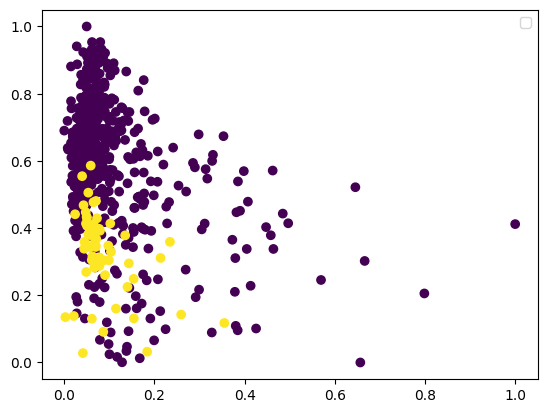

In [12]:
plt.scatter(X[:,1], X[:,6], c=ms.labels_)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


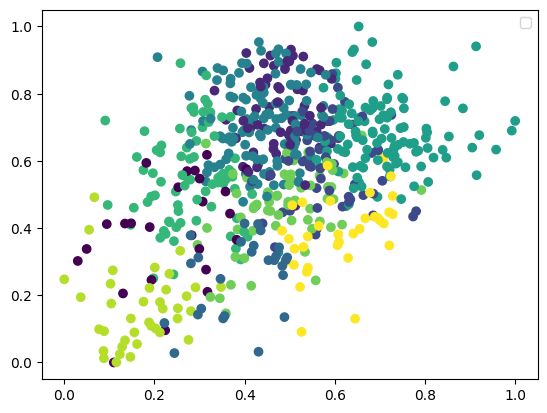

In [12]:
plt.scatter(X[:,5], X[:,6], c=km.labels_)
plt.legend()
plt.show()

In [14]:
from statistics import median
from scipy.spatial import distance

def get_distance_from_centroid(datum, kmeans):
    cluster = kmeans.predict([datum])
    centroid = kmeans.cluster_centers_[cluster]
    dist = distance.euclidean(centroid[0], datum) 
    return dist

def get_median_distance_from_centroids(data_points, kmeans):
    distances = []
    for d in data_points:
        distances.append(get_distance_from_centroid(d, kmeans))
    return median(distances)

def get_anomalies(data_points, kmeans, threshold=2):
    median_dist = get_median_distance_from_centroids(data_points, kmeans)
    anomalies = []
    for k,d in enumerate(data_points):
        dist = get_distance_from_centroid(d, kmeans)
        if dist > median_dist*threshold:
            anomalies.append(k)
    return anomalies

anomalies = get_anomalies(X, km)
cluster_labels = km.labels_
cluster_labels[anomalies] = 999
df["Cluster"] = cluster_labels
df["Cluster"].value_counts()

Cluster
4      122
5      116
6       75
1       64
2       59
7       55
8       35
9       32
999     30
3       23
0       21
Name: count, dtype: int64

In [13]:
X_df.columns

Index(['Aged 15 years and under', 'Aged 16 to 24 years', 'Aged 25 to 34 years',
       'Aged 35 to 49 years', 'Aged 50 to 64 years', 'Aged 65 years and over',
       'Ref16_Results', '2019_Resultscon_pc', '2019_Resultslab_pc',
       '2019_Resultslib_pc', '2019_Resultsref_pc', '2019_Resultsnat_pc',
       '2019_Resultsoth_pc'],
      dtype='object')

In [15]:
df["Cluster"] = km.labels_

In [16]:
df["Cluster"].value_counts()

Cluster
4    123
5    117
6     76
1     70
2     61
7     61
8     38
9     35
3     26
0     25
Name: count, dtype: int64

In [15]:
df = df.drop(unnamed_cols, axis=1)

In [16]:
df.to_csv("outputs/resultsclusteredconstituencies.csv",index=False)

In [18]:
clusters = list(set(list(df["Cluster"])))
print("AGE: ",df["Aged 65 years and over"].mean())
print("Ref: ",df["Ref16_Results"].mean())
print("Lab: ",df["2019_Resultslab_pc"].mean())
for c in clusters:
    rdf = df[df["Cluster"]==c]
    print("Cluster: ",c,"_________________________")
    # if c == 0:
    #     print("Young Labour Cities")
    # if c == 1:
    #     print("Old Conservative Heartlands")
    # if c == 2:
    #     print("Leave-voting Labour(Red Wall?)")
    # if c == 3:
    #     print("Conservative-LibDem battlegrounds")
    # if c == 4:
    #     print("SNP/Plaid Heartlands")
    # if c == 5:
    #     print("Labour Strongholds")
    # if c == 6:
    #     print("Young Labour Areas")
    # if c == 7:
    #     print("Leave-voting Conservative area")


    #10 2024
    if c == 0:
        print("Very Strong Labour Vote: Cardiff South and Penarth") #Labour
    if c == 1:
        print("Strong Leave Vote, High Brexit Party Vote, Common in the North of England: Sheffield South East") #Brexit
    if c == 2:
        print("Typical Marginal seats with high proportion of retired: Hastings and Rye") #Marginals
    if c == 3:
        print("Very Low Tory Vote, Stong SNP Area: Paisley and Renfrewshire North") #SNP
    if c == 4:
        print("Conservative, Brexit-voting area, Common in the Midlands: Rugby") #Pro-Brexit Conservatives
    if c == 5:
        print("Very Old Very Conservative, common in SW and Wales: Mid Norfolk") #Conservative
    if c == 6:
        print("Family Area, Strong Labour Vote, common in London, Muslim/Immigrant : Leicester East") #Immigrant
    if c == 7:
        print("Very Low Labour Vote, Conservative-Lib Dem Battleground, Common in SE: Witney") #LibCon
    if c == 8:
        print("Very Young Very Remain, common in London: Ealing Central and Acton") #Remain
    if c == 9:
        print("Nationalist V Conservatives Area: Central Ayrshire") #Nat-Con Marginals
    print("AGE: ",rdf["Aged 65 years and over"].mean())
    print("AGE: ",rdf["Aged 15 years and under"].mean())
    print("Ref: ",rdf["Ref16_Results"].mean())
    print("Con: ",rdf["2019_Resultscon_pc"].mean())
    print("Lab: ",rdf["2019_Resultslab_pc"].mean())
    print("Lib: ",rdf["2019_Resultslib_pc"].mean())
    print("Ref: ",rdf["2019_Resultsref_pc"].mean())
    print("Nat: ",rdf["2019_Resultsnat_pc"].mean())


AGE:  0.19072858216367958
Ref:  0.5187494686441332
Lab:  0.34631643170612575
Cluster:  0 _________________________
Very Strong Labour Vote: Cardiff South and Penarth
AGE:  0.12804632593641863
AGE:  0.16333362198270732
Ref:  0.4374042919643327
Con:  0.27966446203549705
Lab:  0.6005955069937137
Lib:  0.06907988801996005
Ref:  0.04208672173442968
Nat:  0.0023919070554863477
Cluster:  1 _________________________
Strong Leave Vote, High Brexit Party Vote, Common in the North of England: Sheffield South East
AGE:  0.19324477501789966
AGE:  0.18742020392907974
Ref:  0.6069811349794914
Con:  0.3482970628328561
Lab:  0.45848706560882113
Lib:  0.051302941085127673
Ref:  0.10363548718738413
Nat:  0.0175411765505111
Cluster:  2 _________________________
Typical Marginal seats with high proportion of retired: Hastings and Rye
AGE:  0.22287856240165566
AGE:  0.17075571082353216
Ref:  0.5295843613516799
Con:  0.480030991445309
Lab:  0.4086736562754493
Lib:  0.07003678858398546
Ref:  0.022333626366506

In [29]:
for region in list(set(list(df["Region"]))):
    print(region)
    print(df[df["Region"]==region]["Cluster"].mode())

South East
0    7
Name: Cluster, dtype: int32
East Midlands
0    4
1    5
Name: Cluster, dtype: int32
Eastern
0    4
Name: Cluster, dtype: int32
North East
0    1
Name: Cluster, dtype: int32
South West
0    5
Name: Cluster, dtype: int32
Yorkshire & the Humber
0    1
Name: Cluster, dtype: int32
Wales
0    4
1    5
Name: Cluster, dtype: int32
West Midlands
0    4
Name: Cluster, dtype: int32
Scotland
0    9
Name: Cluster, dtype: int32
London
0    6
1    8
Name: Cluster, dtype: int32
North West
0    1
Name: Cluster, dtype: int32


In [30]:
for cluster in clusters:
    print(cluster)
    print(df[df["Cluster"]==cluster]["Region"].mode())

0
0    Wales
Name: Region, dtype: object
1
0    Wales
Name: Region, dtype: object
2
0    Wales
Name: Region, dtype: object
3
0    Scotland
Name: Region, dtype: object
4
0    Wales
Name: Region, dtype: object
5
0    Wales
Name: Region, dtype: object
6
0    Wales
Name: Region, dtype: object
7
0    South East
Name: Region, dtype: object
8
0    Wales
Name: Region, dtype: object
9
0    Scotland
Name: Region, dtype: object


In [19]:
from sklearn.metrics import pairwise_distances_argmin_min
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, X)
df.loc[closest]

,ONS code,New constituency name,Total population,Aged 15 years and under,Aged 16 to 24 years,Aged 25 to 34 years,Aged 35 to 49 years,Aged 50 to 64 years,Aged 65 years and over,Cluster,...,2005_Resultstot,2005_Resultscon_pc,2005_Resultslab_pc,2005_Resultslib_pc,2005_Resultsref_pc,2005_Resultsnat_pc,2005_Resultsoth_pc,EngReg,Scot,Region
99,W07000091,Cardiff South and Penarth,106457.0,0.153574,0.230281,0.168941,0.171694,0.142273,0.133237,0,...,38552,0.219159,0.429394,0.259001,0.0,0.048765,0.043681,0,False,Wales
434,E14001470,Sheffield South East,104078.0,0.190175,0.100972,0.136321,0.178626,0.203847,0.190059,1,...,40718,0.143917,0.592539,0.179282,0.0,0.000000,0.084262,Yorkshire & the Humber,False,Yorkshire & the Humber
228,E14001274,Hastings and Rye,104817.0,0.172310,0.087534,0.118425,0.180677,0.220184,0.220871,2,...,43613,0.389884,0.401165,0.156696,0.0,0.000000,0.052255,South East,False,South East
625,S14000101,Paisley and Renfrewshire North,90100.0,0.166508,0.097220,0.142050,0.189700,0.211715,0.192808,3,...,37540,0.121577,0.482232,0.172909,0.0,0.182552,0.040730,0,True,Scotland
417,E14001453,Rugby,109407.0,0.192410,0.090442,0.138291,0.205508,0.190006,0.183343,4,...,46157,0.413783,0.401239,0.171740,0.0,0.000000,0.013237,West Midlands,False,West Midlands
322,E14001365,Mid Norfolk,96185.0,0.163385,0.085929,0.110808,0.165578,0.215077,0.259222,5,...,41081,0.492612,0.340255,0.123171,0.0,0.000000,0.043962,Eastern,False,Eastern
280,E14001326,Leicester East,124655.0,0.219640,0.119491,0.137140,0.215990,0.172975,0.134765,6,...,40909,0.195776,0.591410,0.156127,0.0,0.000000,0.056687,East Midlands,False,East Midlands
558,E14001591,Witney,97260.0,0.186109,0.087343,0.129570,0.193810,0.206549,0.196617,7,...,42759,0.478332,0.224654,0.239903,0.0,0.000000,0.057111,South East,False,South East
160,E14001207,Ealing Central and Acton,132426.0,0.171462,0.117802,0.197227,0.236902,0.162393,0.114215,8,...,41078,0.317737,0.346852,0.272871,0.0,0.000000,0.062540,London,False,London
587,S14000010,Central Ayrshire,87000.0,0.163812,0.089998,0.108917,0.167824,0.229914,0.239535,9,...,42871,0.221175,0.464300,0.160505,0.0,0.115906,0.038114,0,True,Scotland
